In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path
import pprint as pp

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
#sns.set_style("darkgrid") # configuração de estilos dos gráficos do seaborn
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
# Cada simulacao executada 100 vezes
# como temos três modos de interferência: 0, 1 e 2
# então foram executadas 300 repeticoes no total.

def inferir_modeInterferencia_de_repeticao(item):
    if item <= 100:
        return 0
    elif item <= 200:
        return 1
    elif item <= 300:
        return 2
    else:
        raise Exception('Parâmetro não esperado!')


def calcula_porcentagem_taxaMAC(dados, repeticao = 0):
    if repeticao != 0:
        dados = dados[dados["repeticao"] == repeticao]
    df = dados.groupby(by="taxaMAC",as_index=False).count()
    total = df["node"].sum()
    resultado = pd.DataFrame()
    resultado['taxaMAC'] = df['taxaMAC']
    resultado["freq_absoluta"] = df["node"]
    resultado["freq_relativa"] = df["node"] / total
    return resultado

In [3]:
diretorioPA = 'simulacao_4.0.0_PA'
diretorioPB = 'simulacao_4.0.1_PB'

arquivoDados = 'dataTaxaMacFromMacLayer.csv'
colunas = ['tempo', 'node', 'taxaMAC', 'repeticao'] # como os dados estão organizados no arquivo

# DADOS DA SIMULAÇÃO PA
arquivo = path.join(diretorioPA, arquivoDados)
dfTaxaMacPA = pd.read_csv(arquivo,delimiter='|',names=colunas)
dfTaxaMacPA['InterfModel'] = dfTaxaMacPA['repeticao'].apply(inferir_modeInterferencia_de_repeticao)
dfTaxaMacPA['simulacao'] = 'PA'

# DADOS DA SIMULAÇÃO PB
arquivo = path.join(diretorioPB, arquivoDados)
dfTaxaMacPB = pd.read_csv(arquivo,delimiter='|', names=colunas)
dfTaxaMacPB['InterfModel'] = dfTaxaMacPB['repeticao'].apply(inferir_modeInterferencia_de_repeticao)
dfTaxaMacPB['simulacao'] = 'PB'

In [4]:
# OCORRÊNCIA DA TAXA MAC EM PA

df = dfTaxaMacPA[dfTaxaMacPA['InterfModel'] != 2]
dfOcorrenciasTaxaMacPA = calcula_porcentagem_taxaMAC(df)
dfOcorrenciasTaxaMacPA.T

,0,1,2,3,4,5
taxaMAC,0.000000,20.000000,40.000000,60.000000,80.000000,100.000000
freq_absoluta,2371.000000,9040.000000,28975.000000,84438.000000,205320.000000,620358.000000
freq_relativa,0.002494,0.009511,0.030484,0.088835,0.216012,0.652664


In [5]:
# OCORRÊNCIA DA TAXA MAC EM PB

dfOcorrenciasTaxaMacPB = calcula_porcentagem_taxaMAC(dfTaxaMacPB)
dfOcorrenciasTaxaMacPB.T

,0,1,2,3,4,5
taxaMAC,0.000000,20.000000,40.000000,60.000000,80.000000,100.000000
freq_absoluta,289928.000000,206046.000000,228425.000000,251449.000000,257823.000000,382685.000000
freq_relativa,0.179371,0.127476,0.141321,0.155565,0.159509,0.236758


In [6]:
# Gráfico que sobrepõem as barras de valores entre as simulações PA e PB
# gráfico preto e cinza

# fig = dfOcorrenciasTaxaMacPA['freq_relativa'].plot(kind='bar',color='black', label='PA')
# fig = dfOcorrenciasTaxaMacPB['freq_relativa'].plot(kind='bar', color='gray', label='PB', ax=fig, alpha=0.5)
# fig.legend()

In [7]:
dfTaxaMAC = dfTaxaMacPA.append(dfTaxaMacPB,ignore_index=True)
dfTaxaMAC.sample(5)

,tempo,node,taxaMAC,repeticao,InterfModel,simulacao
1255008,36.050237,3,100,265,2,PA
1912096,54.009093,4,80,92,0,PB
2861680,105.440006,5,20,267,2,PB
832222,83.812189,5,80,176,1,PA
1203338,71.862441,5,40,254,2,PA


In [8]:
# sns.countplot(x='taxaMAC',hue='simulacao', data=dfTaxaMAC)

Text(0.5,0,'Valores taxaMAC')

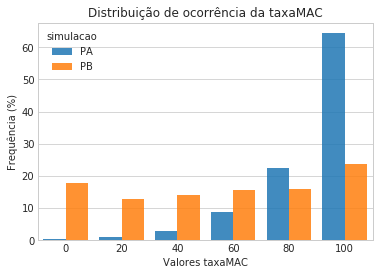

In [21]:
# DISTRIBUIÇÃO DA TAXA MAC PARA TODOS OS NÓS
# DAS SIMULAÇÕES PA E PB

df = dfTaxaMacPA
# df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
# df = df[df['node'] != 4]

dfPA = calcula_porcentagem_taxaMAC(df)
dfPA['simulacao'] = 'PA'
# fig = sns.barplot(x='taxaMAC',y='freq_relativa', data=df,saturation=1, color='#F2000D')

df = dfTaxaMacPB
# df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2 ]
# df = df[df['node'] != 4]
dfPB = calcula_porcentagem_taxaMAC(df)
dfPB['simulacao'] = 'PB'

dfPorcentagem = dfPA.append(dfPB,ignore_index=True)
dfPorcentagem['freq_relativa'] = dfPorcentagem['freq_relativa'] * 100

fig = sns.barplot(x='taxaMAC',y='freq_relativa', hue='simulacao',
                  data=dfPorcentagem,
                  saturation=1, alpha=0.85)

fig.set_title('Distribuição de ocorrência da taxaMAC')
fig.set_ylabel('Frequência (%)')
fig.set_xlabel('Valores taxaMAC')

Text(0.5,0,'Valores PRR')

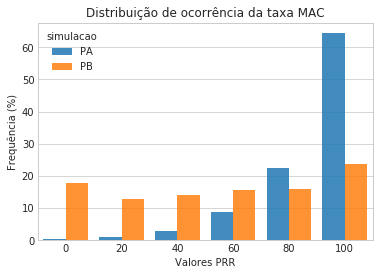

In [10]:
fig = sns.barplot(x='taxaMAC',y='freq_relativa', hue='simulacao',
                  data=dfPorcentagem,
                  saturation=1, alpha=0.85)

fig.set_title('Distribuição de ocorrência da taxa MAC')
fig.set_ylabel('Frequência (%)')
fig.set_xlabel('Valores PRR')

In [11]:
dfPorcentagem['freq_relativa'].sum()

200.0

In [12]:
# df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
# df = df[df['node'] != 4]

# fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=0.75, palette='Reds')
# fig.set_title('Distribuição Taxa MAC - PA')

In [13]:
# df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2]
# df = df[df['node'] != 4]

# fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=0.8, palette='Blues')
# fig.set_title('Distribuição Taxa MAC - PB')

Text(0.5,1,'Distribuição Taxa MAC\nNós 1, 3 e 5')

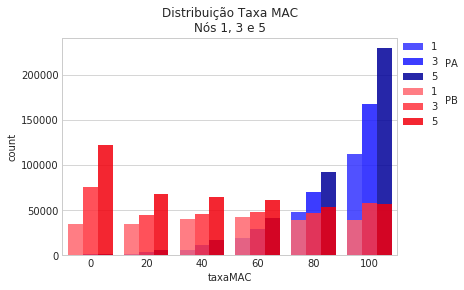

In [14]:
sns.set_style('whitegrid')
df = dfTaxaMacPA[dfTaxaMacPA['node'] != 2]
df = df[df['node'] != 4]

cmPA = {
    1 : '#3333ff',
    3 : '#1a1aff',
    5 : '#000099'
}

fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=1, palette=cmPA, alpha=0.85)

df = dfTaxaMacPB[dfTaxaMacPB['node'] != 2 ]
df = df[df['node'] != 4]

cmPB = {
    1 : '#ff666e',
    3 : '#ff333d',
    5 : '#F2000D'
}

fig = sns.countplot(x='taxaMAC',hue='node', data=df,saturation=1, palette=cmPB, ax=fig, alpha=0.85)

#fig.legend()
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

plt.figtext(1.01,0.78,'PA')
plt.figtext(1.01,0.65,'PB')

fig.set_title('Distribuição Taxa MAC\nNós 1, 3 e 5')

In [15]:
# dfTaxaMacPA.groupby(by="taxaMAC",as_index=False).count()

## Distribuição Binomial

Text(0.5,1,'Distribuição Binomial')

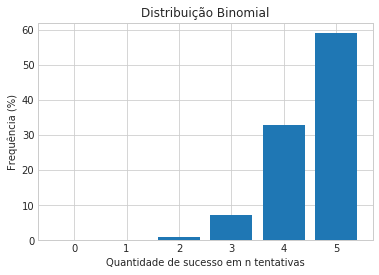

In [16]:
# Importando a Distribuição binomial da biblioteca scipy
from scipy.stats import binom

n, p = 5, 0.9
x = np.arange(0,n+1,1)
y = binom.pmf(x,n,p) * 100

plt.grid(b=None, which='minor', axis='x')

fig = plt.bar(x,y)

plt.xlabel("Quantidade de sucesso em n tentativas")
plt.ylabel("Frequência (%)")
plt.title('Distribuição Binomial')

### Distribuição logarítimica Discreta

In [17]:
from scipy.stats import logser

<BarContainer object of 5 artists>

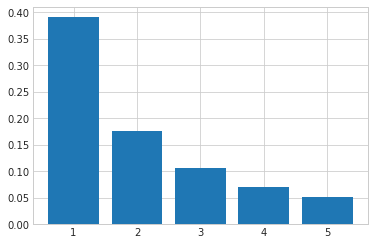

In [18]:
p = 0.9
x = np.arange(1,6,1)
rv = logser(p)
y = rv.pmf(x)
plt.bar(x,y)

<BarContainer object of 5 artists>

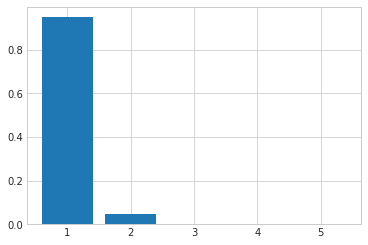

In [19]:
p = 0.1
x = np.arange(1,6,1)
rv = logser(p)
y = rv.pmf(x)
plt.bar(x,y)

### Zipf Distribuição

<BarContainer object of 5 artists>

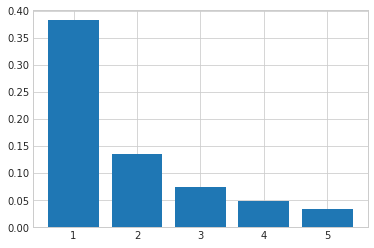

In [20]:
from scipy.stats import zipf
a = 1.5
rv = zipf(a)
x = np.arange(1,6,1)
y = rv.pmf(x)
plt.bar(x,y)